In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [2]:
gdf = gpd.read_file("clean_data/master.shp")

In [3]:
gdf.shape

(944, 182)

## Constructing weight matrices

In [4]:
import libpysal
import esda

In [5]:
wq = libpysal.weights.Queen.from_dataframe(gdf)
# queen

C:\Users\fiend\Anaconda2\envs\capstone\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 863.
  warnings.warn(message)


In [6]:
wq.n

944

In [7]:
wr = libpysal.weights.Rook.from_dataframe(gdf)
# root

In [8]:
wr.n

944

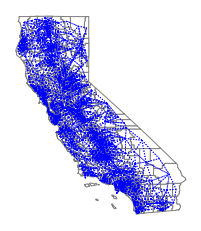

In [9]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = wq.plot(gdf, ax=ax,
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [10]:
wr.neighbors[0]

[594, 11, 13]

In [11]:
gdf['DistrictNa'][[0, 594,11,13]]

0            Alameda Unified
594    San Francisco Unified
11           Oakland Unified
13       San Leandro Unified
Name: DistrictNa, dtype: object

In [12]:
gdf

,index,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictNa,DistrictTy,GradeLow,GradeHigh,GradeLowCe,GradeHighC,AssistStat,CongressUS,SenateCA,AssemblyCA,LocaleDist,UpdateNote,EnrollTota,EnrollChar,EnrollNonC,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetP,MathTested,MathStdMet,CCPrepCoho,CCPrepPct,AbsentElig,AbsentPct,GradCohort,GradPct,UCCSUReqMe,DropOutPct,EnrollCumu,SuspPct,SHAPE_Leng,SHAPE_Area,Unnamed__0,district_1,unduplicat,base_grant,supplement,concentrat,total_gran,cds,District_C,e_chan_AA,e_chan_AI,e_chan_ALL,e_chan_AS,e_chan_EL,e_chan_ELO,e_chan_EO,e_chan_FI,e_chan_FOS,e_chan_HI,e_chan_HOM,e_chan_MR,e_chan_PI,e_chan_RFP,e_chan_SED,e_chan_SWD,e_chan_WH,e_curr_AA,e_curr_AI,e_curr_ALL,e_curr_AS,e_curr_EL,e_curr_ELO,e_curr_EO,e_curr_FI,e_curr_FOS,e_curr_HI,e_curr_HOM,e_curr_MR,e_curr_PI,e_curr_RFP,e_curr_SED,e_curr_SWD,e_curr_WH,e_prio_AA,e_prio_AI,e_prio_ALL,e_prio_AS,e_prio_EL,e_prio_ELO,e_prio_EO,e_prio_FI,e_prio_FOS,e_prio_HI,e_prio_HOM,e_prio_MR,e_prio_PI,e_prio_RFP,e_prio_SED,e_prio_SWD,e_prio_WH,m_chan_AA,m_chan_AI,m_chan_ALL,m_chan_AS,m_chan_EL,m_chan_ELO,m_chan_EO,m_chan_FI,m_chan_FOS,m_chan_HI,m_chan_HOM,m_chan_MR,m_chan_PI,m_chan_RFP,m_chan_SED,m_chan_SWD,m_chan_WH,m_curr_AA,m_curr_AI,m_curr_ALL,m_curr_AS,m_curr_EL,m_curr_ELO,m_curr_EO,m_curr_FI,m_curr_FOS,m_curr_HI,m_curr_HOM,m_curr_MR,m_curr_PI,m_curr_RFP,m_curr_SED,m_curr_SWD,m_curr_WH,m_prio_AA,m_prio_AI,m_prio_ALL,m_prio_AS,m_prio_EL,m_prio_ELO,m_prio_EO,m_prio_FI,m_prio_FOS,m_prio_HI,m_prio_HOM,m_prio_MR,m_prio_PI,m_prio_RFP,m_prio_SED,m_prio_SWD,m_prio_WH,geometry
0,NaN,1,2018-19,0601770,0161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,0.335,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,10,Alameda Unified,0.3486,"75,938,983","5,294,466",-,"82,158,116",1.611190e+12,11190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-13606221.352 4540862.002, -13..."
1,NaN,2,2018-19,0601860,0161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,0.304,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,16,Albany City Unified,0.2833,"29,644,972","1,679,684",-,"31,352,540",1.611270e+12,11270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-13612889.056 4565138.930, -13612894..."
2,NaN,3,2018-19,0604740,0161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City

## Calculating Moran's I

`Moran's I` is a global measure of spatial autocorrelation, which is similar to a correlation coeffecient in that it varies between maximum -1 and 1; a value toward -1 indicates uniform dispersion of the variable, while a value toward 1 indicates clustering. A Moran's I of 0 would indicate spatial randomness.  

In [13]:
from esda.moran import Moran

In [14]:
upc = gdf['UPpct']

In [15]:
mi = Moran(upc, wq)

('WARNING: ', 863, ' is an island (no neighbors)')


In [16]:
mi.I
# float, non-adjusted

0.40767141327580475

In [17]:
mi.p_sim
# p value

0.001

A Moran's I of 0.4076 indicates global clustering on the variable (the unduplicated pupil count).

In [18]:
bins_list = [0.10, 0.25, 0.5499, 0.7, 1]
cm = plt.cm.cividis_r

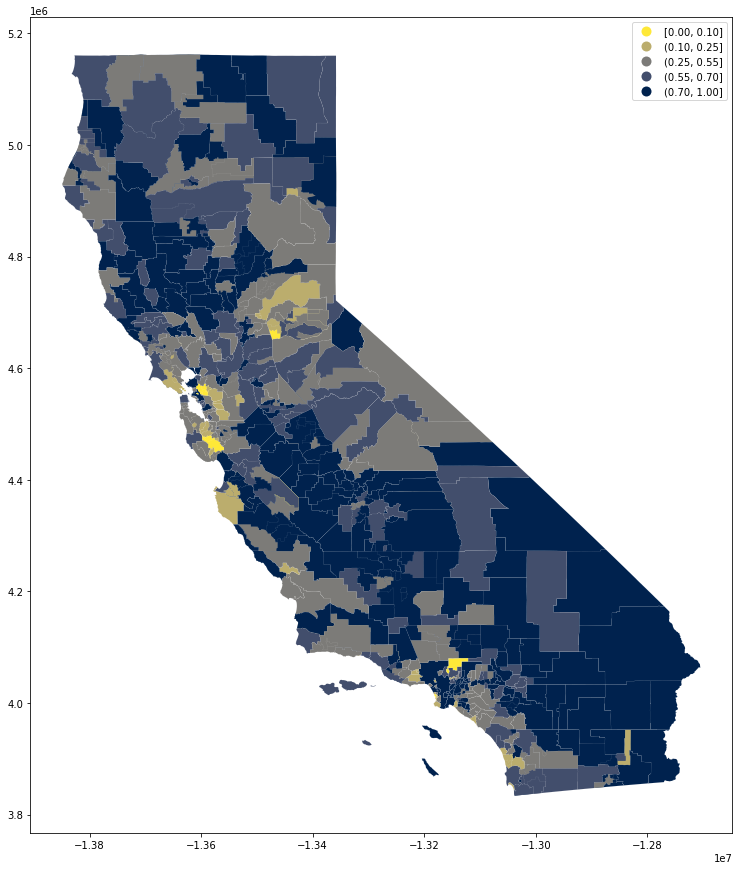

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15,15))

gdf.plot(
    column=upc,
    legend=True,
    scheme='userdefined',
    classification_kwds={'bins':bins_list},
    linewidth=.05,
    edgecolor='white',
    cmap=cm,
    ax=ax
        )

In [20]:
from esda.moran import Moran_Local

In [21]:
lag_upc = libpysal.weights.lag_spatial(wq, upc)

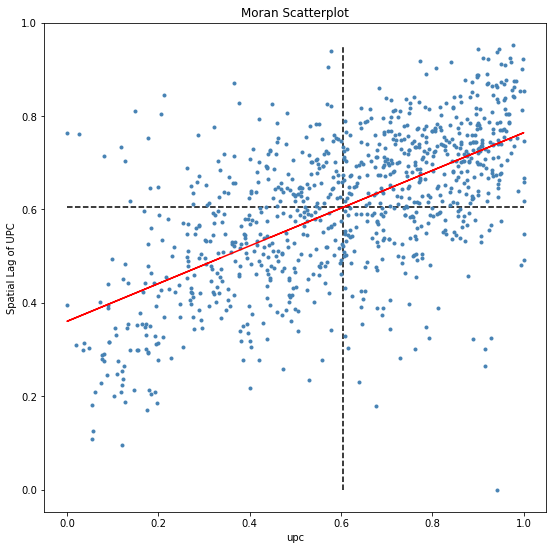

In [22]:
b, a = np.polyfit(upc, lag_upc, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(upc, lag_upc, '.', color='steelblue')

 # dashed vert at mean of the upc
plt.vlines(upc.mean(), lag_upc.min(), lag_upc.max(), linestyle='--')
 # dashed horizontal at mean of lagged upc 
plt.hlines(lag_upc.mean(), upc.min(), upc.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(upc, a + b*upc, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of UPC')
plt.xlabel('upc')
plt.show()

In [23]:
lm = Moran_Local(upc, wq)
# bug with newest esda v?

ValueError: cannot assign slice from input of different size

In [24]:
import esda

In [25]:
esda.__version__

'2.3.1'

In [ ]:
upcbi = upc > upc.median()

In [ ]:
results = esda.Join_Counts(upcbi, wq)

In [ ]:
results.p_sim_bb
# p value for autocorrelation

## Segregation indices

Atkinson: where  b  is a shape parameter that determines how to weight the increments to segregation contributed by different portions of the [Lorenz](https://www.youtube.com/watch?v=WxrznHLYaFg) curve.

In [ ]:
from segregation.aspatial import Atkinson

In [ ]:
index = Atkinson(gdf, 'HIcount', 'EnrollTota', b = 0.5)
type(index)

In [ ]:
index.statistic